In [3]:
import numpy as np

import matplotlib
matplotlib.rc('font', family='arial') 
import matplotlib.pyplot as plt
import dask.array as da
import flika as flk
from glob import glob
flk.start_flika()
from flika.window import Window as flw
from dask.array.image import imread as daim
from moviepy.editor import ImageSequenceClip, VideoClip, concatenate_videoclips

from skimage.exposure import rescale_intensity

from json import load
from skimage.io import imread
from fishtrack.measurements import tail_angle
from scipy.ndimage.filters import median_filter
from fish.image.vol import dff

Starting flika
flika menubar already initialized.
Starting flika inside IPython


In [87]:
from glob import glob
base_dirs = glob('/nrs/ahrens/davis/data/epi/20170621/*spon*/')

In [207]:
fish_roi = (slice(1000, None), slice(20,-20), slice(20,-20))

for ind, base_dir in enumerate(base_dirs):
    exp_name = base_dirs[exp].split('/')[-2]
    dset = daim(base_dir + 'Pos0/*.tif')
    
    reg = imread(glob(base_dirs[exp] +'*aligned.tif')[0])

    cropped = reg[fish_roi]
    thrm = np.array([t[t > 2200].mean() for t in cropped])
    diff = np.abs(np.diff(cropped.astype('float32'), axis=0))
    diffm = np.array([t[t > 30].mean() for t in diff])

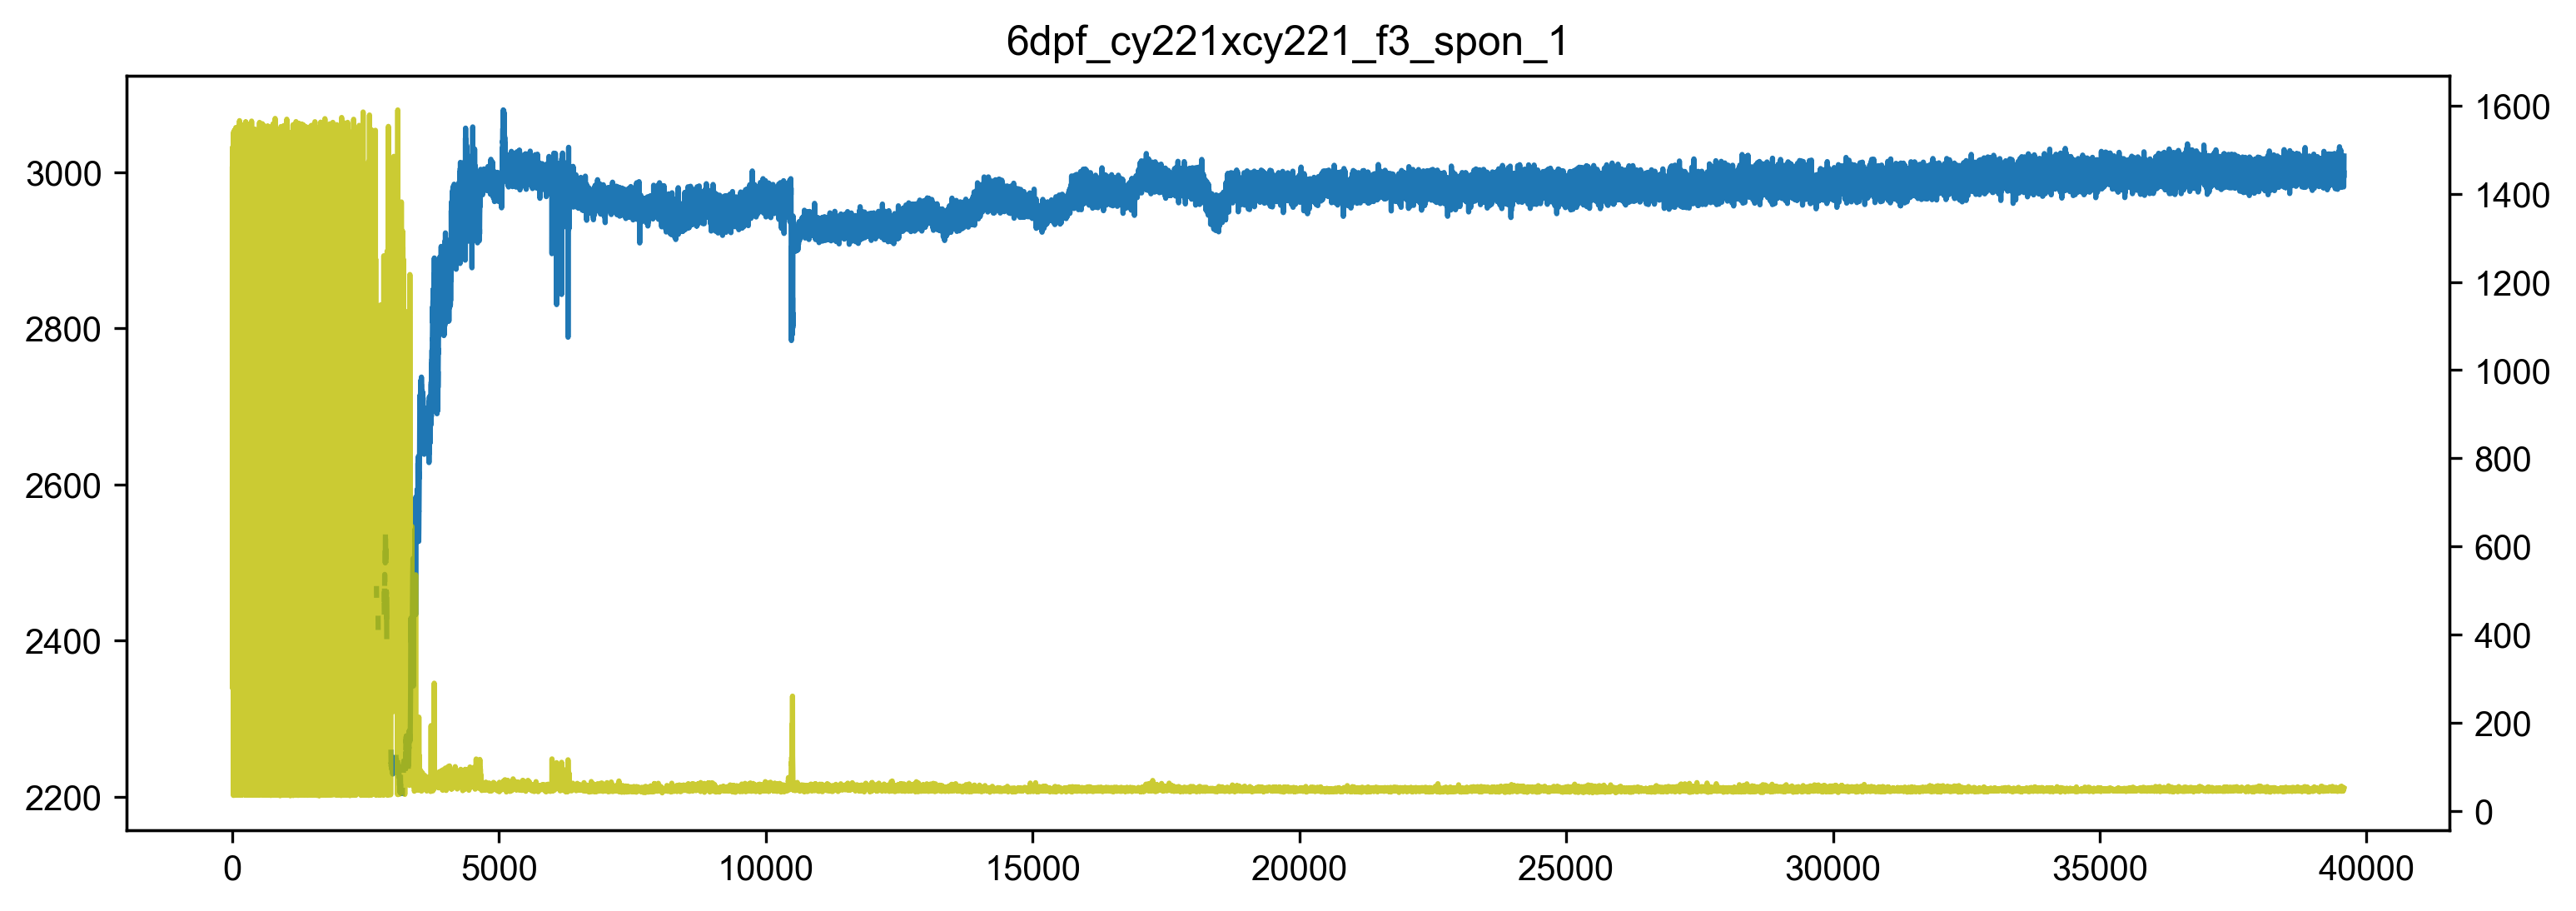

In [211]:
fig, axs = plt.subplots(figsize=(12,4), dpi=300)
axs.plot(thrm)
axs.twinx().plot(median_filter(diffm,3), color='y', alpha=.8)
axs.title.set_text(exp_name)

In [212]:
flw(reg)

In [132]:
flw(diff)

Text(0.5,1,'6dpf_cy221xcy221_f2_spon_2')

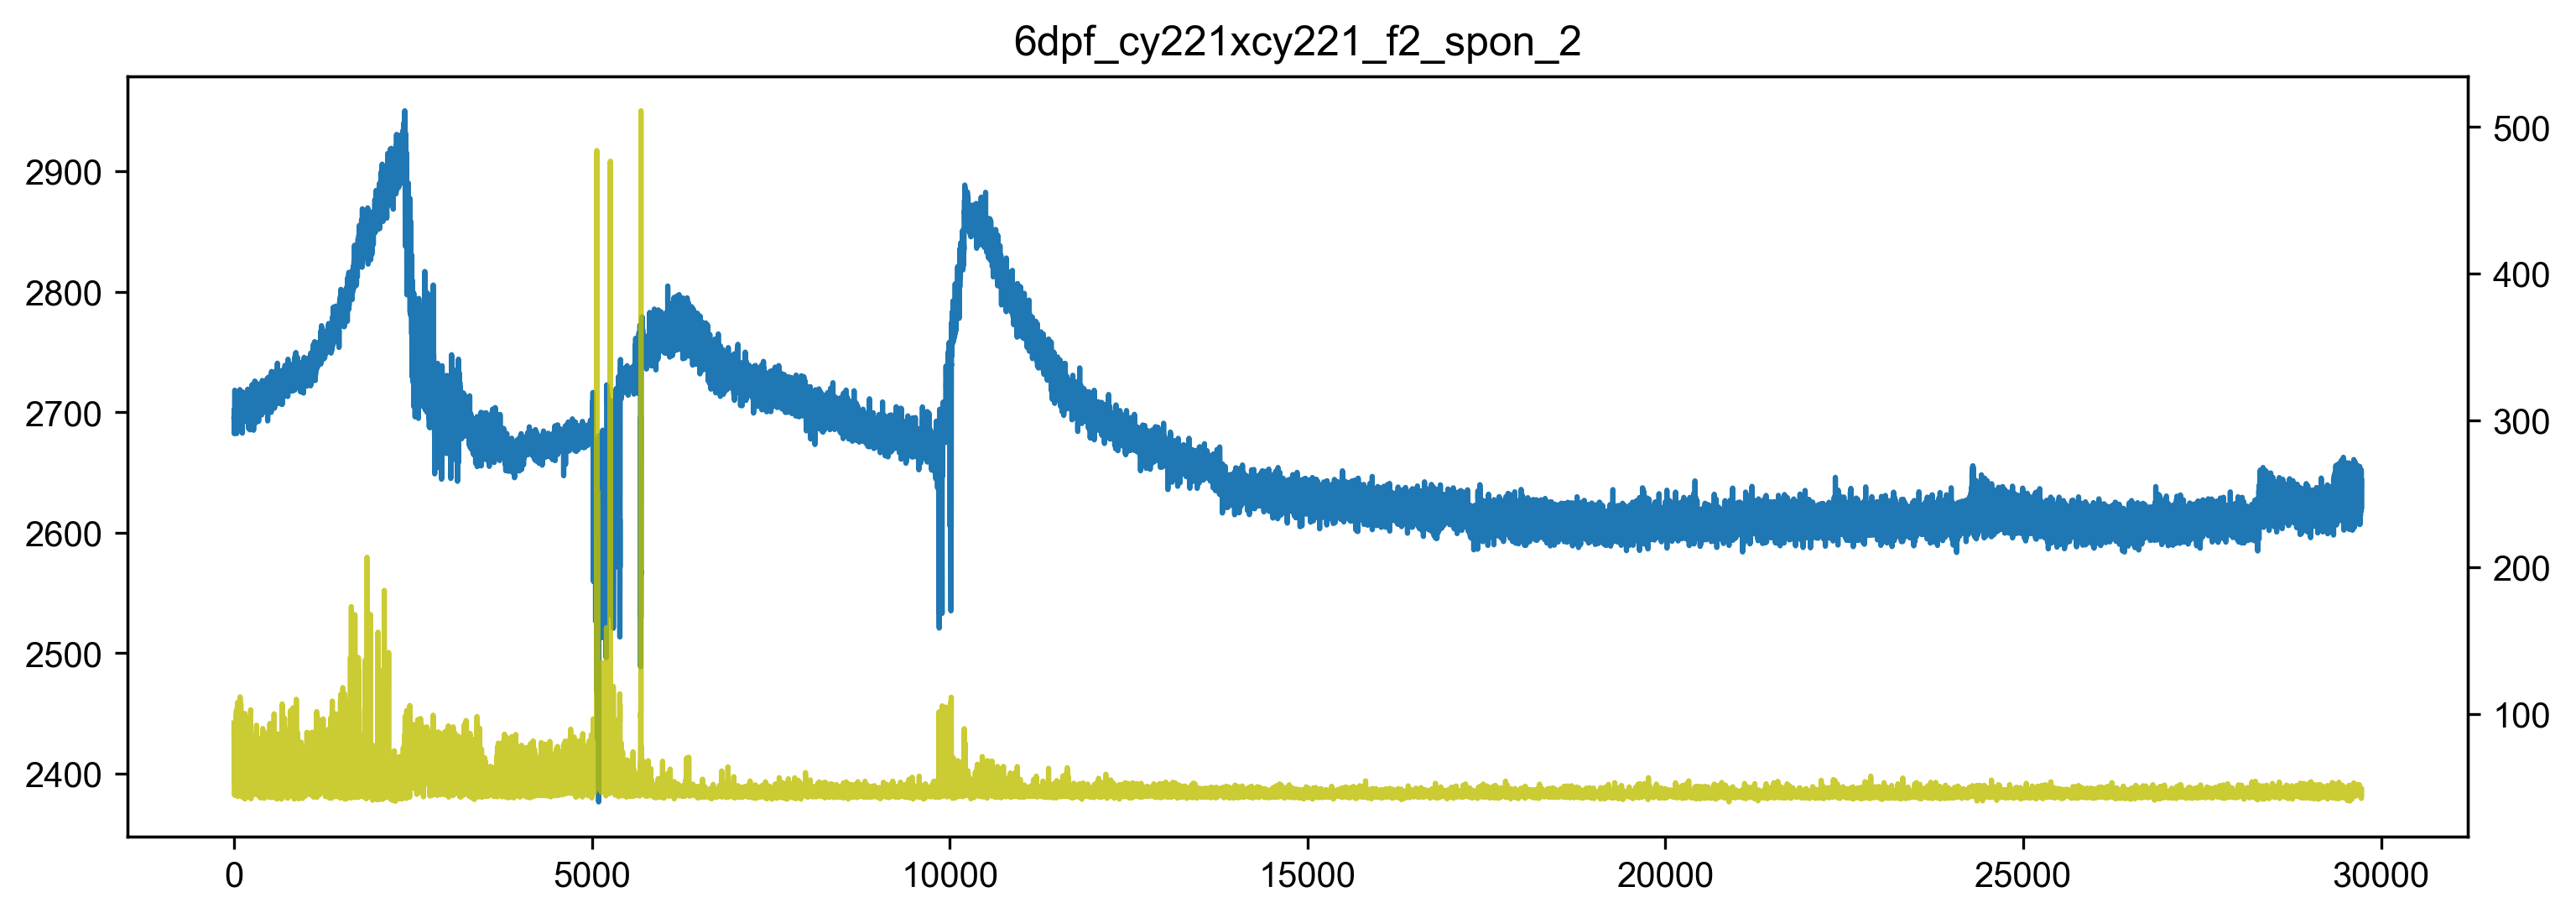

In [126]:
fig, axs = plt.subplots(figsize=(12,4), dpi=300)
axs.plot(thrm.clip(0,5000))
axs.twinx().plot(diffm.clip(0,1000), color='y', alpha=.8)
plt.title(exp_name)